## Scraping OMX C20 stock prices from Nasdaq using Selenium and Chromedriver

In [191]:
#Data importet pr. 26-08-2018
from selenium import webdriver
import os.path


browser =webdriver.Chrome("C:/Users/ander/Downloads/chromedriver_win32/chromedriver.exe") # define path to your chromedriver

tickers={'MAERSK_A':'CSE3200','MAERSK_B':'CSE3201','CARL_B':'CSE1596','CHR':'CSE75663',\
         'COLO_B':'CSE3203','DANSKE':'CSE1586','DSV':'CSE3415','FLS':'CSE3207','GEN':'CSE11143',\
         'GN':'CSE3205','ISS':'CSE80901','JYSK':'CSE1587','NDA_DKK':'CSE4861','NOVO_B':'CSE1158',\
         'NZYM_B':'CSE11273','PNDORA':'CSE77855','TRYG':'CSE31315','VWS':'CSE3258','WDH':'CSE3247'}


for i in tickers:
    urlblok=tickers.get(i)
    nasdurl='http://www.nasdaqomxnordic.com/aktier/microsite?Instrument=' + str(urlblok)
    browser.get(nasdurl) # opens a webpage using the browser objects get method.
    selector = '.showHistory > span:nth-child(1)' # define selector to the email field
    element = browser.find_element_by_css_selector(selector) # find this element using the .find_element_by_css_selector method
    element.click()
    selector='#fromDate'
    element = browser.find_element_by_css_selector(selector)
    startdate='2006-01-02' #Setting start date
    element.send_keys(startdate) # send the data
    selector='#btnUpdate > span:nth-child(1)'
    element=browser.find_element_by_css_selector(selector)
    element.click()
    selector='#exportExcel' #Downloading the data to the computer
    element=browser.find_element_by_css_selector(selector)
    element.click()

## Reading, converting to DataFrame and appending the Closing Prices 

In [233]:
import pandas as pd

tickers={'MAERSK_A':'CSE3200','MAERSK_B':'CSE3201','CARL_B':'CSE1596','CHR':'CSE75663' ,\
         'COLO_B':'CSE3203','DANSKE':'CSE1586','DSV':'CSE3415','FLS':'CSE3207','GEN':'CSE11143',\
         'GN':'CSE3205','ISS':'CSE80901','JYSK':'CSE1587','NDA_DKK':'CSE4861','NOVO_B':'CSE1158',\
         'NZYM_B':'CSE11273','PNDORA':'CSE77855','TRYG':'CSE31315','VWS':'CSE3258','WDH':'CSE3247'}


path_csv="C:/Users/ander/Desktop/group19/Eksamensprojekt/omx_c20/"

df_c20=pd.DataFrame()

for i in tickers:
    nasd_csv=path_csv +str(i)+ "-2006-01-02-2018-08-26.csv"
    df= pd.read_csv(nasd_csv,sep=";",header=1)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True) #Setting the date as index
    df_o=pd.DataFrame(df)
    df_r=df_o['Closing price'] # Getting only the closing price
    df_c20=pd.concat([df_c20,df_r], axis=1) 

headers=list(tickers.keys())
df_c20.columns=headers
df_c20 #Closing prices with headers for stocks of the 20 largest firms in Denmark by market cap 

#df.groupby([df_c20.index.year, df_c20.index.month]).count()


df_c20=df_c20.groupby(pd.Grouper(freq='M')).nth(0) #getting the closing price of the last trading day in the month
df_c20.iloc[23:48,:]


#df_c20.groupby([df_c20.index.year, df_c20.index.month]).count()
#df_c20        .agg({'count'})

,MAERSK_A,MAERSK_B,CARL_B,CHR,COLO_B,DANSKE,DSV,FLS,GEN,GN,ISS,JYSK,NDA_DKK,NOVO_B,NZYM_B,PNDORA,TRYG,VWS,WDH
Date,,,,,,,,,,,,,,,,,,,
2007-12-31,"12080,00","12240,00","512,585",NaN,"94,80","189,70","118,25","508,00","317,00","40,00",NaN,"371,263","85,00","67,20","112,80",NaN,"78,80","495,50","93,30"
2008-01-31,"10700,00","10740,00","497,248",NaN,"89,50","187,387","110,00","519,00","306,00","40,30",NaN,"370,798","83,75","65,00","117,40",NaN,"78,60","552,00","94,00"
2008-02-29,"9960,00","10020,00","441,549",NaN,"82,40","171,193","99,50","452,00","302,50","28,20",NaN,"301,564","68,00","61,80","80,90",NaN,"72,90","497,50","67,20"
2008-03-31,"9920,00","9940,00","491,597",NaN,"81,40","172,35","94,25","461,00","297,00","23,90",NaN,"303,423","74,25","67,50","86,90",NaN,"74,90","516,00","70,90"
2008-04-30,"10680,00","10720,00","516,621",NaN,"88,10","166,566","106,75","481,00","232,00","23,30",NaN,"305,281","80,25","64,80","87,40",NaN,"84,30","516,00","78,60"
2008-05-31,"10100,00","10100,00","524,693",NaN,"93,00","157,081","122,25","527,00","261,50","26,50",NaN,"311,322","82,75","64,60","90,80",NaN,"83,80","516,00","78,80"
2008-06-30,"11780,00","11780,00","495,50",NaN,"83,20","149,909","122,25","576,00","250,00","32,70",NaN,"293,665","76,50","61,70","103,60",NaN,"77,80","664,00","69,00"
2008-07-31,"11120,00","11080,00","433,50",NaN,"83,60","124,925","107,25","514,00","182,00","21,70",NaN,"253,704","64,75","63,10","83,90",NaN,"64,60","618,00","61,00"
2008-08-31,"10720,00","10740,00","376,00",NaN,"79,40","127,238","99,50","448,00","328,00","24,50",NaN,"276,937","67,75","61,90","88,00",NaN,"70,60","615,00","57,80"


TypeError: can't multiply sequence by non-int of type 'float'

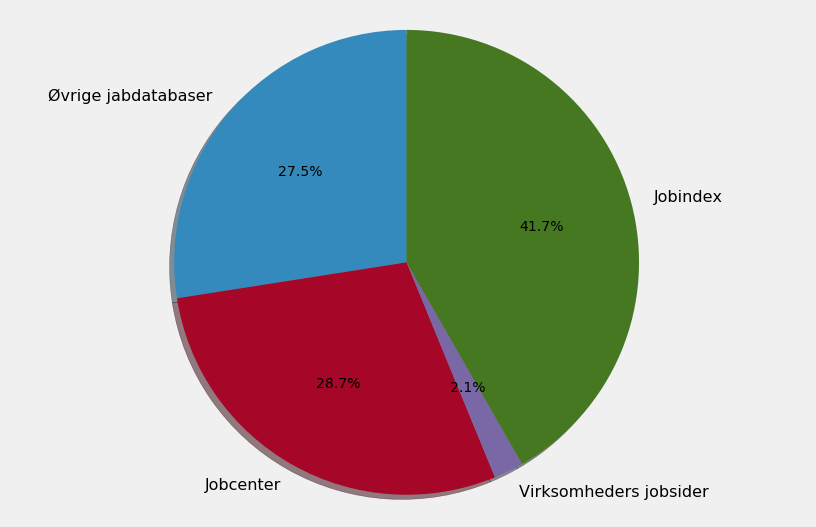

In [264]:
#Figur 1  - taken manually from https://www.jobindex.dk/jobsoegning/analyse-kilder

import matplotlib.pyplot as plt
import matplotlib

#Job adds sources per. 26-08-2018
jobsammensætning={'Øvrige jabdatabaser':3783, 'Jobcenter':3957,\
                  'Virksomheders jobsider':285,"Jobindex":5745}
dictval=[]

for key, value in jobsammensætning.items():
    temp = [value]
    dictval.append(temp)


fig1, ax1 = plt.subplots()
ax1.pie(dictval, labels=jobsammensætning.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.savefig('Fig1.png')

<Figure size 640x480 with 0 Axes>

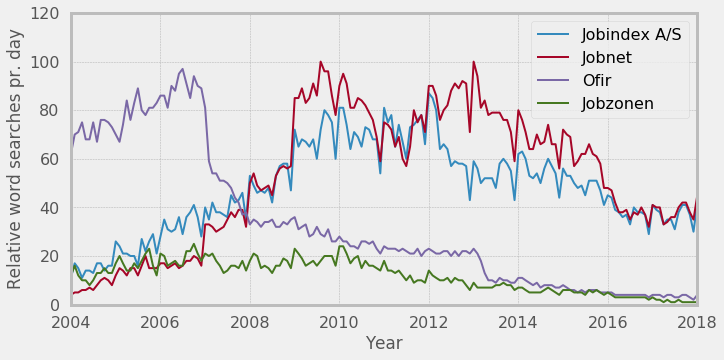

In [265]:
#Figur 2  - downloaded manually from https://trends.google.dk/trends/explore?date=all&geo=DK&q=%2Fm%2F0kbgkxk,Jobnet,Ofir,Jobzonen

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
figure(figsize=(10,5))

#Job adds sources per. 26-08-2018
fig2_sti='C:/Users/ander/Desktop/group19/Eksamensprojekt/multiTimeline.csv'
fig2_csv=fig2_sti
df_fig2= pd.read_csv(fig2_csv, header=1)
df_fig2['Month'] = pd.to_datetime(df_fig2['Month'])
df_fig2.columns=['Year','Jobindex A/S', 'Jobnet', 'Ofir', 'Jobzonen']
#df_fig2.set_index('Year', inplace=True)
#df_fig2.plot.line()
plt.plot(df_fig2['Year'], df_fig2['Jobindex A/S'])
plt.plot(df_fig2['Year'], df_fig2['Jobnet'])
plt.plot(df_fig2['Year'], df_fig2['Ofir'])
plt.plot(df_fig2['Year'], df_fig2['Jobzonen'])
plt.xlabel('Year')
plt.ylabel('Relative word searches pr. day')
plt.ylim(0,120)
plt.xlim('01-01-2004','01-01-2018')
plt.legend()
plt.savefig('Fig2.png')

